In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [ ]:
#read the data from the dataframe
data = pd.read_excel("IKM surabaya.xlsx")
data

In [3]:
# Filter dan hapus baris dengan 'Usaha Besar' pada kolom 'Uraian Skala Usaha'
data1 = data.loc[data['Uraian Skala Usaha'] != 'Usaha Besar']

In [ ]:
# Pastikan kolom yang dipilih ada dalam dataset
selected_columns = ['Nama Perusahaan', 'Uraian Status Penanaman Modal','Uraian Jenis Perusahaan', 'Uraian Risiko Proyek', 'Judul Kbli', 'luas_tanah', 'Jumlah Investasi', 'TKI', 'Uraian Skala Usaha']

# Filter data untuk hanya menampilkan baris dengan "Judul Kbli" = "Industri Pencetakan Umum"
data1 = data1[selected_columns]
# Tampilkan hasil filter
data1

In [5]:
# Menampilkan tipe data setiap kolom
print("\nTipe Data Awal:")
print(data1.dtypes)


Tipe Data Awal:
Nama Perusahaan                  object
Uraian Status Penanaman Modal    object
Uraian Jenis Perusahaan          object
Uraian Risiko Proyek             object
Judul Kbli                       object
luas_tanah                       object
Jumlah Investasi                  int64
TKI                               int64
Uraian Skala Usaha               object
dtype: object


In [6]:
def convert_to_numeric(series):
    # Menggunakan pd.to_numeric dengan 'errors' parameter untuk menangani nilai yang salah format
    return pd.to_numeric(series, errors='coerce')
data1['luas_tanah'] = convert_to_numeric(data1['luas_tanah'])

In [7]:
# Menampilkan tipe data setiap kolom
print("\nTipe Data Setelah Transform:")
print(data1.dtypes)


Tipe Data Setelah Transform:
Nama Perusahaan                   object
Uraian Status Penanaman Modal     object
Uraian Jenis Perusahaan           object
Uraian Risiko Proyek              object
Judul Kbli                        object
luas_tanah                       float64
Jumlah Investasi                   int64
TKI                                int64
Uraian Skala Usaha                object
dtype: object


In [8]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values = data1['Uraian Skala Usaha'].unique()
unique_values 

array(['Usaha Kecil', 'Usaha Menengah', 'Usaha Mikro', nan], dtype=object)

In [9]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values1 = data1['Uraian Risiko Proyek'].unique()
unique_values1 

array(['Rendah', 'Menengah Rendah', 'Menengah Tinggi', 'Tinggi'],
      dtype=object)

In [10]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values = data1['Uraian Jenis Perusahaan'].unique()
unique_values 

array(['Perorangan', 'Perseroan Terbatas (PT)',
       'Persekutuan Komanditer (CV / Commanditaire Vennootschap)',
       'Perseroan Terbatas (PT) Perorangan', 'Badan Hukum Lainnya',
       'Koperasi', 'PT', 'CV',
       'Persekutuan Firma (Fa / Venootschap Onder Firma)',
       'PT Perorangan', 'Persekutuan dan Perkumpulan', 'Yayasan',
       'Perusahaan Umum Daerah (Perumda)', 'Badan Layanan Umum (BLU)'],
      dtype=object)

In [11]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values = data1['Judul Kbli'].unique()
unique_values 

array(['Industri Bumbu Masak Dan Penyedap Masakan',
       'Industri Furnitur Untuk Operasi, Perawatan Kedokteran Dan Kedokteran Gigi',
       'Industri Komputer Dan/Atau Perakitan Komputer',
       'Industri Produk Roti Dan Kue', 'Industri Pencetakan Umum',
       'Industri Barang Dari Karet Untuk Keperluan Industri',
       'Industri Pakaian Jadi (Konveksi) Dari Tekstil',
       'Industri Barang Dari Plastik Untuk Pengemasan',
       'Industri Furnitur Dari Kayu', 'Industri Tinta',
       'Industri Produk Makanan Lainnya',
       'Industri Tepung Campuran dan Adonan Tepung',
       'Industri Makanan dan Masakan Olahan',
       'Industri Minyak Goreng Kelapa Sawit',
       'Industri Produk Masak  Lainnya', 'Industri Wadah Dari Kayu',
       'Industri Barang Dari Logam Siap Pasang Untuk Konstruksi Lainnya',
       'Industri Pengolahan Gula Lainnya Bukan Sirop',
       'Industri Barang Plastik Lainnya Ytdl',
       'Industri Berbasis Daging Lumatan Dan Surimi',
       'Industri Kosmetik

In [12]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values = data1['Uraian Status Penanaman Modal'].unique()
unique_values 

array(['PMDN'], dtype=object)

In [13]:
# Definisikan mapping untuk menyamakan format value
jenis_perusahaan_map = {
    'Perorangan' : 'Perorangan',
    'Perseroan Terbatas (PT)': 'PT',
    'Perseroan Terbatas (PT) Perorangan': 'PT Perorangan',
    'Persekutuan Komanditer (CV / Commanditaire Vennootschap)': 'CV',
    'Persekutuan Firma (Fa / Venootschap Onder Firma)': 'Firma',
    'Persekutuan dan Perkumpulan': 'Persekutuan dan Perkumpulan',
    'Badan Hukum Lainnya': 'Badan Hukum Lainnya',
    'Badan Layanan Umum (BLU)': 'BLU',
    'Perusahaan Umum Daerah (Perumda)': 'Perumda',
    # Tambahkan map lainnya sesuai kebutuhan
}

# Transformasi data dengan map
data1['Uraian Jenis Perusahaan'] = data1['Uraian Jenis Perusahaan'].replace(jenis_perusahaan_map)

# Tampilkan hasil transformasi
print(data1['Uraian Jenis Perusahaan'].unique())

['Perorangan' 'PT' 'CV' 'PT Perorangan' 'Badan Hukum Lainnya' 'Koperasi'
 'Firma' 'Persekutuan dan Perkumpulan' 'Yayasan' 'Perumda' 'BLU']


In [ ]:
data1

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Define columns to encode (excluding those that we'll manually encode)
columns_to_encode = ['Judul Kbli']

# Initialize LabelEncoders
label_encoders = {col: LabelEncoder() for col in columns_to_encode}

# Perform label encoding on each column
for col in columns_to_encode:
    data[col] = label_encoders[col].fit_transform(data[col])

# Manually encode 'Uraian Skala Usaha'
scale_mapping = {'Usaha Kecil': 1, 'Usaha Menengah': 2, 'Usaha Mikro': 0}
data1['Uraian Skala Usaha'] = data1['Uraian Skala Usaha'].map(scale_mapping)

# Manually encode 'Uraian Risiko Proyek'
risk_mapping = {'Rendah': 0, 'Menengah Rendah': 1, 'Menengah Tinggi': 2, 'Tinggi': 3}
data1['Uraian Risiko Proyek'] = data1['Uraian Risiko Proyek'].map(risk_mapping)

# Manually encode 'Uraian Jenis Perusahaan'
company_mapping = {
    'Perorangan': 0,
    'PT': 1,
    'CV': 3,
    'PT Perorangan': 2,
    'Badan Hukum Lainnya': 4,
    'Koperasi': 5,
    'Firma': 6,
    'Persekutuan dan Perkumpulan': 7,
    'Yayasan': 8,
    'Perumda': 9,
    'BLU': 10
}
data1['Uraian Jenis Perusahaan'] = data1['Uraian Jenis Perusahaan'].map(company_mapping)

# Print the DataFrame to check the changes
data1

In [ ]:
data1

In [17]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values = data1['Uraian Jenis Perusahaan'].unique()
unique_values 

array([ 0,  1,  3,  2,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [18]:
# Menampilkan nilai unik dari kolom 'Uraian Skala Usaha'
unique_values = data1['Uraian Skala Usaha'].unique()
unique_values 

array([ 1.,  2.,  0., nan])

In [19]:
# Cek nilai kosong pada masing-masing fitur atau variabel
missing_values = data1.isnull().sum()

# Tampilkan jumlah nilai kosong untuk setiap fitur
print("Jumlah nilai kosong untuk setiap fitur:")
print(missing_values)

Jumlah nilai kosong untuk setiap fitur:
Nama Perusahaan                    0
Uraian Status Penanaman Modal      0
Uraian Jenis Perusahaan            0
Uraian Risiko Proyek               0
Judul Kbli                         0
luas_tanah                       182
Jumlah Investasi                   0
TKI                                0
Uraian Skala Usaha                17
dtype: int64


In [20]:
# Menghapus baris dengan nilai NaN pada kolom 'luas_tanah'
data1 = data1.dropna(subset=['luas_tanah'])

In [ ]:
# Drop the column you want to delete
data1 = data1.drop(columns=['Uraian Status Penanaman Modal'])
data1

In [22]:
# Memisahkan data dengan NaN pada kolom 'Uraian Skala Usaha'
data_nan = data1[data1['Uraian Skala Usaha'].isna()]

# Menghapus baris dengan NaN pada kolom 'Uraian Skala Usaha' dari data asli
data1 = data1.dropna(subset=['Uraian Skala Usaha'])

In [ ]:
data_nan

In [ ]:
data1

In [25]:
# memilih kolom dalam dataset
selected_columns = [ 'Uraian Jenis Perusahaan',	'Uraian Risiko Proyek', 'luas_tanah',	'Jumlah Investasi',	'TKI',	'Uraian Skala Usaha']

# Filter data untuk hanya menampilkan kolom dipilih
data2 = data1[selected_columns]

# Tampilkan hasil filter
data2

,Uraian Jenis Perusahaan,Uraian Risiko Proyek,luas_tanah,Jumlah Investasi,TKI,Uraian Skala Usaha
3,1,0,300.0,400000000,20,1.0
4,3,0,500.0,300000000,14,0.0
5,3,0,200.0,200000000,2,1.0
6,1,0,99.0,100000000,1,1.0
7,3,2,10.0,25000000,1,0.0
...,...,...,...,...,...,...
32174,0,0,10.0,2300000,2,0.0
32175,0,0,10.0,1000000,1,0.0
32176,0,1,97.0,1500000,1,0.0
32177,0,0,4.0,500000,1,0.0


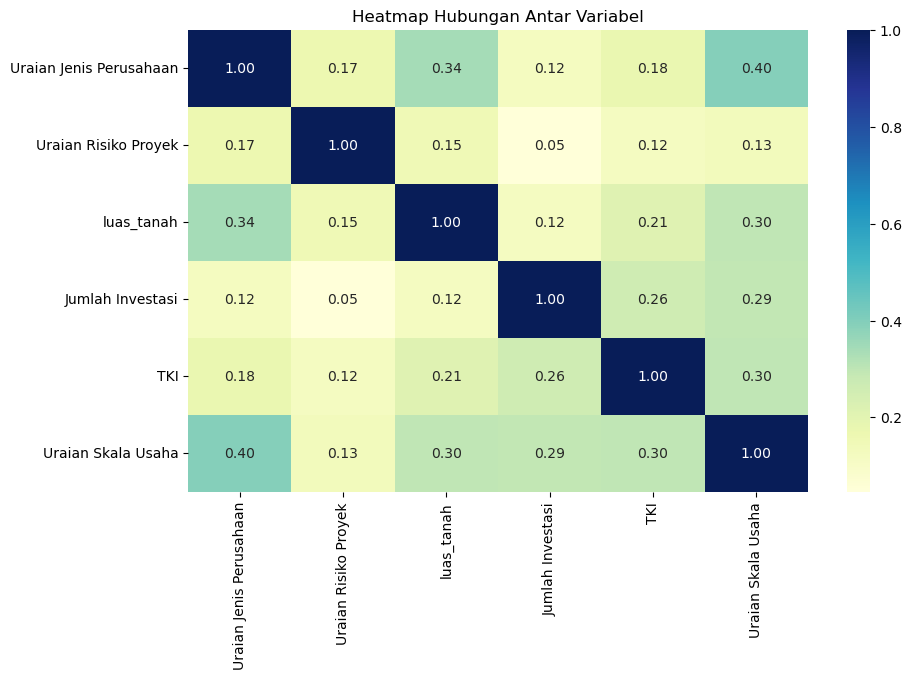

In [26]:
# Membuat heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(data2.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap Hubungan Antar Variabel')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Pisahkan fitur dan label
X = data2[['Uraian Jenis Perusahaan',	'Uraian Risiko Proyek', 'luas_tanah',	'Jumlah Investasi',	'TKI']]
y = data2['Uraian Skala Usaha']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi label untuk data uji
y_pred = model.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model Random Forest:", accuracy)

Akurasi model Random Forest: 0.9542494042891183


In [28]:
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes
nb_model = GaussianNB()

# Latih model Naive Bayes
nb_model.fit(X_train, y_train)

# Prediksi label untuk data uji
y_pred_nb = nb_model.predict(X_test)

# Evaluasi kinerja model Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Akurasi model Naive Bayes:", accuracy_nb)

Akurasi model Naive Bayes: 0.9559968228752979


In [29]:
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model Decision Tree
dt_model.fit(X_train, y_train)

# Prediksi label untuk data uji
y_pred_dt = dt_model.predict(X_test)

# Evaluasi kinerja model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Akurasi model Decision Tree:", accuracy_dt)

Akurasi model Decision Tree: 0.9464654487688642


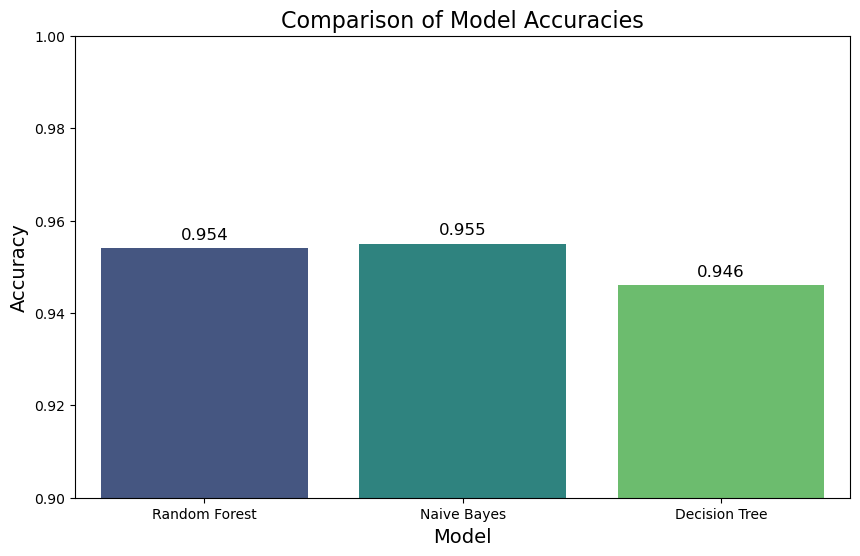

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data akurasi model
models = ['Random Forest', 'Naive Bayes', 'Decision Tree']
accuracies = [0.954, 0.955, 0.946]

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')

# Add titles and labels
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)  # Adjust the y-axis limit to show the range of accuracies

# Show the accuracy values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.002, f"{accuracy:.3f}", ha='center', fontsize=12)

# Display the plot
plt.show()

In [ ]:
data_nan

In [32]:
data_nan = data_nan.drop(columns=['Judul Kbli'])

In [ ]:
# Prepare the features from data_nan
X_nan = data_nan[['Uraian Jenis Perusahaan', 'Uraian Risiko Proyek', 'luas_tanah', 'Jumlah Investasi', 'TKI']]

# Predict labels for the data with missing labels
y_nan_pred = model.predict(X_nan)

# Add the predictions to the data_nan DataFrame
data_nan['Uraian Skala Usaha'] = y_nan_pred

# Print the resulting DataFrame
data_nan

In [ ]:
# Manually encode 'Uraian Jenis Perusahaan'
company_mapping = {
    'Perorangan': 0,
    'PT': 1,
    'CV': 3,
    'PT Perorangan': 2,
    'Badan Hukum Lainnya': 4,
    'Koperasi': 5,
    'Firma': 6,
    'Persekutuan dan Perkumpulan': 7,
    'Yayasan': 8,
    'Perumda': 9,
    'BLU': 10
}
inverse_company_mapping = {v: k for k, v in company_mapping.items()}

# Manually encode 'Uraian Risiko Proyek'
risk_mapping = {'Rendah': 0, 'Menengah Rendah': 1, 'Menengah Tinggi': 2, 'Tinggi': 3}
inverse_risk_mapping = {v: k for k, v in risk_mapping.items()}

# Manually encode 'Uraian Skala Usaha'
scale_mapping = {'Usaha Kecil': 1, 'Usaha Menengah': 2, 'Usaha Mikro': 0}
inverse_scale_mapping = {v: k for k, v in scale_mapping.items()}

data2['Uraian Jenis Perusahaan'] = data2['Uraian Jenis Perusahaan'].map(company_mapping)
data2['Uraian Risiko Proyek'] = data2['Uraian Risiko Proyek'].map(risk_mapping)
data2['Uraian Skala Usaha'] = data2['Uraian Skala Usaha'].map(scale_mapping)
# Reverse the encoding to return to original values
data_nan['Uraian Jenis Perusahaan'] = data_nan['Uraian Jenis Perusahaan'].map(inverse_company_mapping)
data_nan['Uraian Risiko Proyek'] = data_nan['Uraian Risiko Proyek'].map(inverse_risk_mapping)
data_nan['Uraian Skala Usaha'] = data_nan['Uraian Skala Usaha'].map(inverse_scale_mapping)

# Save the resulting DataFrame to a new Excel file
data_nan.to_excel("data_nan_labeled.xlsx", index=False)
data_nan